# Students Performance in Exams EDA

## Importing libraries and setting up environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings ('ignore')

%matplotlib inline
plt.style.use('fivethirtyeight')

### Data Wrangling

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.shape

(1000, 8)

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
nan_count = df.isna().sum().sort_values(ascending = False)

nan_pct = (nan_count/df.shape[0]) * 100

nans = pd.concat([nan_count, nan_pct], axis = 1)

nans.rename(columns = {0 : 'NaN Value Counts', 1 : 'NaN Value Percentage'}, inplace = True)

nans.head(5)

,NaN Value Counts,NaN Value Percentage
writing score,0,0.0
reading score,0,0.0
math score,0,0.0
test preparation course,0,0.0
lunch,0,0.0


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.loc[:,'gender':'test preparation course'] = df.loc[:, 'gender':'test preparation course'].astype('category')

In [10]:
df.describe(include = 'category')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
df['gender'].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [12]:
df['race/ethnicity'].unique()

['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group B', 'group C', 'group A', 'group D', 'group E']

In [13]:
df['parental level of education'].unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']

In [14]:
df['lunch'].unique()

['standard', 'free/reduced']
Categories (2, object): ['standard', 'free/reduced']

In [15]:
df['test preparation course'].unique()

['none', 'completed']
Categories (2, object): ['none', 'completed']

### Summary :
- There is no missing/wrong values in the dataset
- There is no duplicated rows in the data
- There's no wrong outliers in `['math score', 'reading score', 'writing score']` columns
- There's no spelling errors in the categorical columns and no wrong categories

### Data Cleaning

In [16]:
df.rename(columns = {'parental level of education' : 'parental_education',
                    'test preparation course' : 'preparation_course',
                    'math score' : 'math_score',
                    'reading score' : 'reading_score',
                    'writing score' : 'writing_score'}, inplace = True)

df.head()

,gender,race/ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [17]:
pass_grade = 40

In [18]:
df['pass_math'] = 'Yes'
filt = (df['math_score'] <= pass_grade)
df.loc[filt, 'pass_math'] = 'No'
df[['math_score', 'pass_math']].head()

,math_score,pass_math
0,72,Yes
1,69,Yes
2,90,Yes
3,47,Yes
4,76,Yes


In [19]:
df['pass_reading'] = 'Yes'
filt = (df['reading_score'] <= pass_grade)
df.loc[filt, 'pass_reading'] = 'No'
df[['reading_score', 'pass_reading']].head()

,reading_score,pass_reading
0,72,Yes
1,90,Yes
2,95,Yes
3,57,Yes
4,78,Yes


In [20]:
df['pass_writing'] = 'Yes'
filt = (df['writing_score'] <= pass_grade)
df.loc[filt, 'pass_writing'] = 'No'
df[['writing_score', 'pass_writing']].head()

,writing_score,pass_writing
0,74,Yes
1,88,Yes
2,93,Yes
3,44,Yes
4,75,Yes


In [21]:
df['total_pct'] = 100 * (df['math_score'] + df['reading_score'] + df['writing_score'])/300
df[['math_score', 'reading_score', 'writing_score', 'total_pct']].head()

,math_score,reading_score,writing_score,total_pct
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


### Summary :
- I renamed some columns to make easier to deal with
- I added 3 columns as they will help me in the analysis, which are:
    - `'pass_math'`: id the student scored higher than 40 in the math exam `['yes', 'no']`
    - `'pass_reading'`: id the student scored higher than 40 in the reading exam `['yes', 'no']`
    - `'pass_writing'`: id the student scored higher than 40 in the writing exam `['yes', 'no']`
- I add one last column `'total_pct'` which contains the total percentage the student got in all 3 exams

### Exploring

- ## How good did students score in the exames ?

Average score in math: 66.089
Average score in reading: 69.169
Average score in writing: 68.054




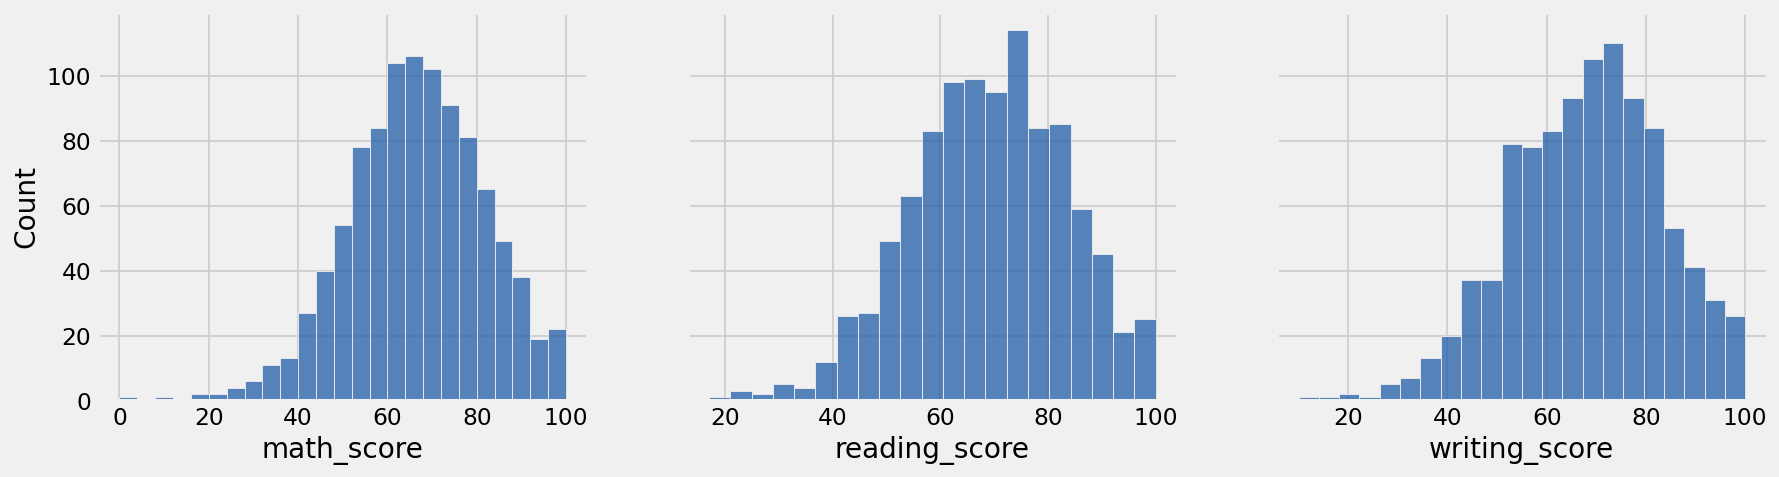

In [22]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4), sharey = True, dpi = 120)

sns.histplot(x= 'math_score', data = df, ax = ax[0], color = '#225ea8')
sns.histplot(x = 'reading_score', data = df, ax = ax[1], color = '#225ea8')
sns.histplot(x = 'writing_score', data = df, ax = ax[2], color = '#225ea8')

math_mean = df['math_score'].mean()
reading_mean = df['reading_score'].mean()
writing_mean = df['writing_score'].mean()

print(f'Average score in math: {math_mean}\nAverage score in reading: {reading_mean}\nAverage score in writing: {writing_mean}\n\n')

plt.show()

<div align = 'center' ><b> Most students score between 50 to 80 in the 3 exams. </b> </div>

_________________________


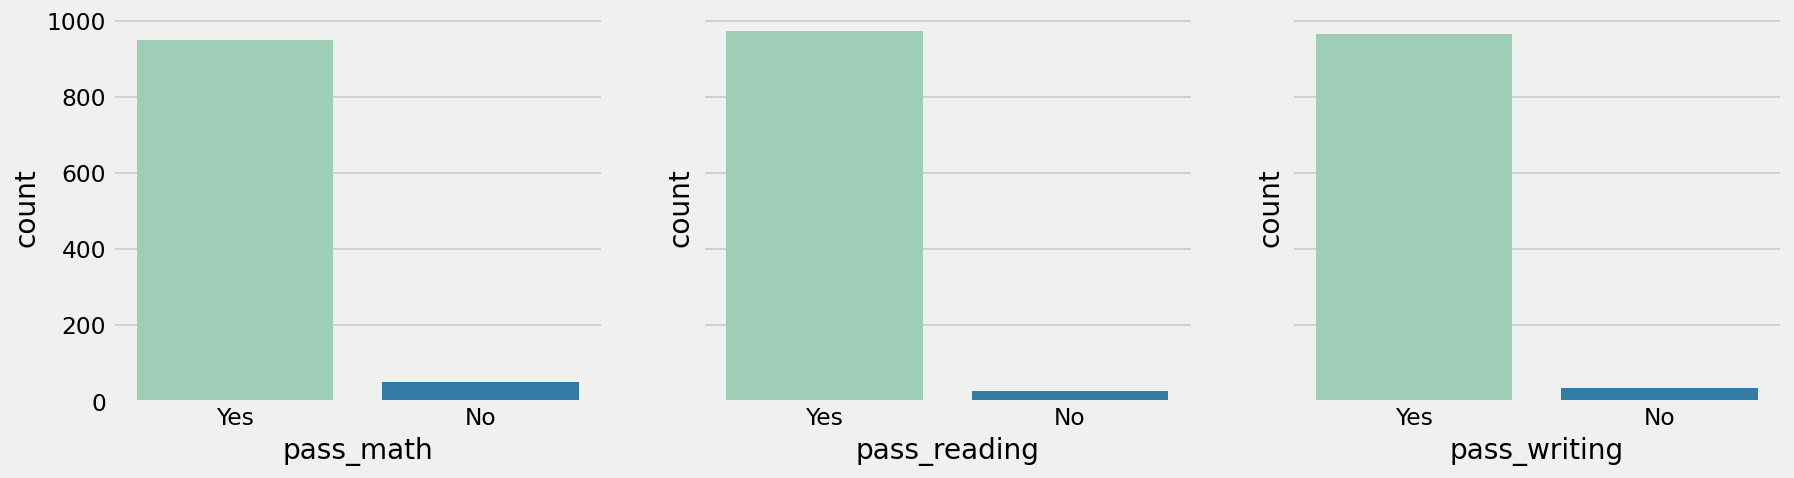

In [23]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4), sharey = True, dpi = 120)

sns.countplot(x = 'pass_math', data = df, ax = ax[0], palette = 'YlGnBu')
sns.countplot(x = 'pass_reading', data = df, ax = ax[1], palette = 'YlGnBu')
sns.countplot(x = 'pass_writing', data = df, ax = ax[2], palette = 'YlGnBu')

plt.show()

<div align = 'center' ><b> Almost all students passed  the 3 exams.</b> </div>

_________________________

- ## Did students who took test preparation course score better ?

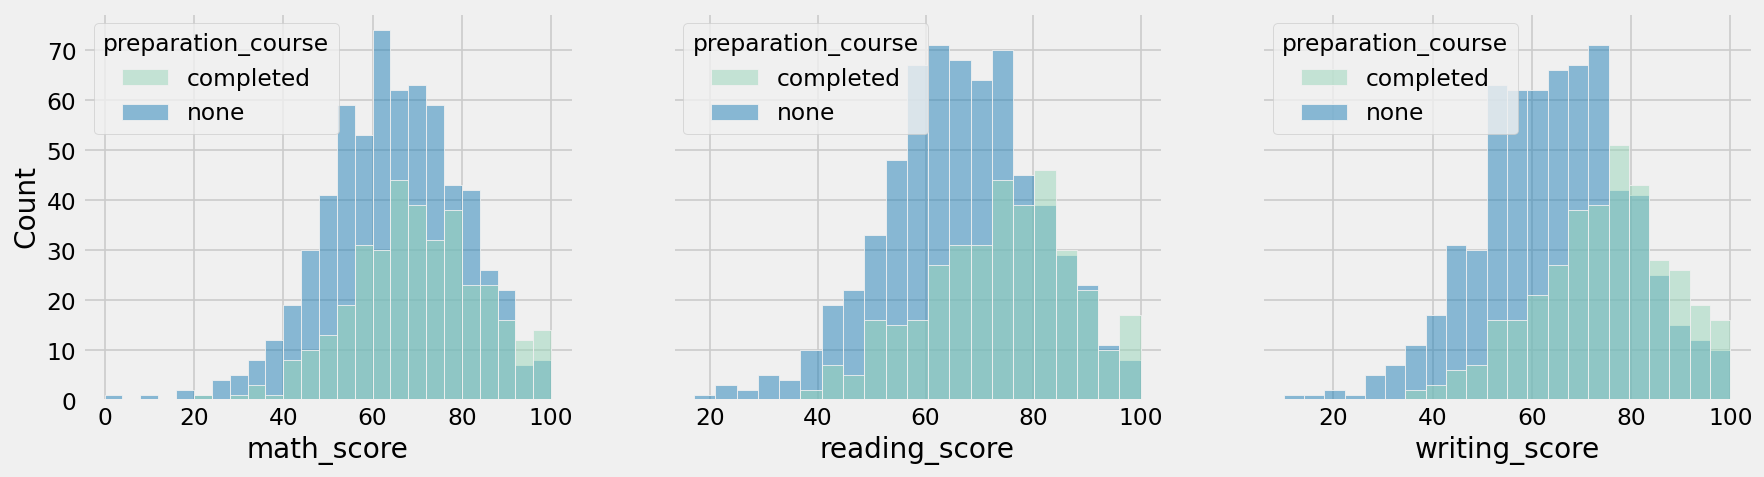

In [24]:
fig, ax = plt.subplots(1, 3, figsize = (16, 4), sharey = True, dpi = 120)

sns.histplot(x = 'math_score', data = df, ax = ax[0], hue = 'preparation_course', palette = 'YlGnBu')
sns.histplot(x = 'reading_score', data = df, ax = ax[1], hue = 'preparation_course', palette = 'YlGnBu')
sns.histplot(x = 'writing_score', data = df, ax = ax[2], hue = 'preparation_course', palette = 'YlGnBu')

plt.show()

<div align = 'center' ><b> We can tell that students who completed the course scored higher than these who didn't.</b> </div>

________________________

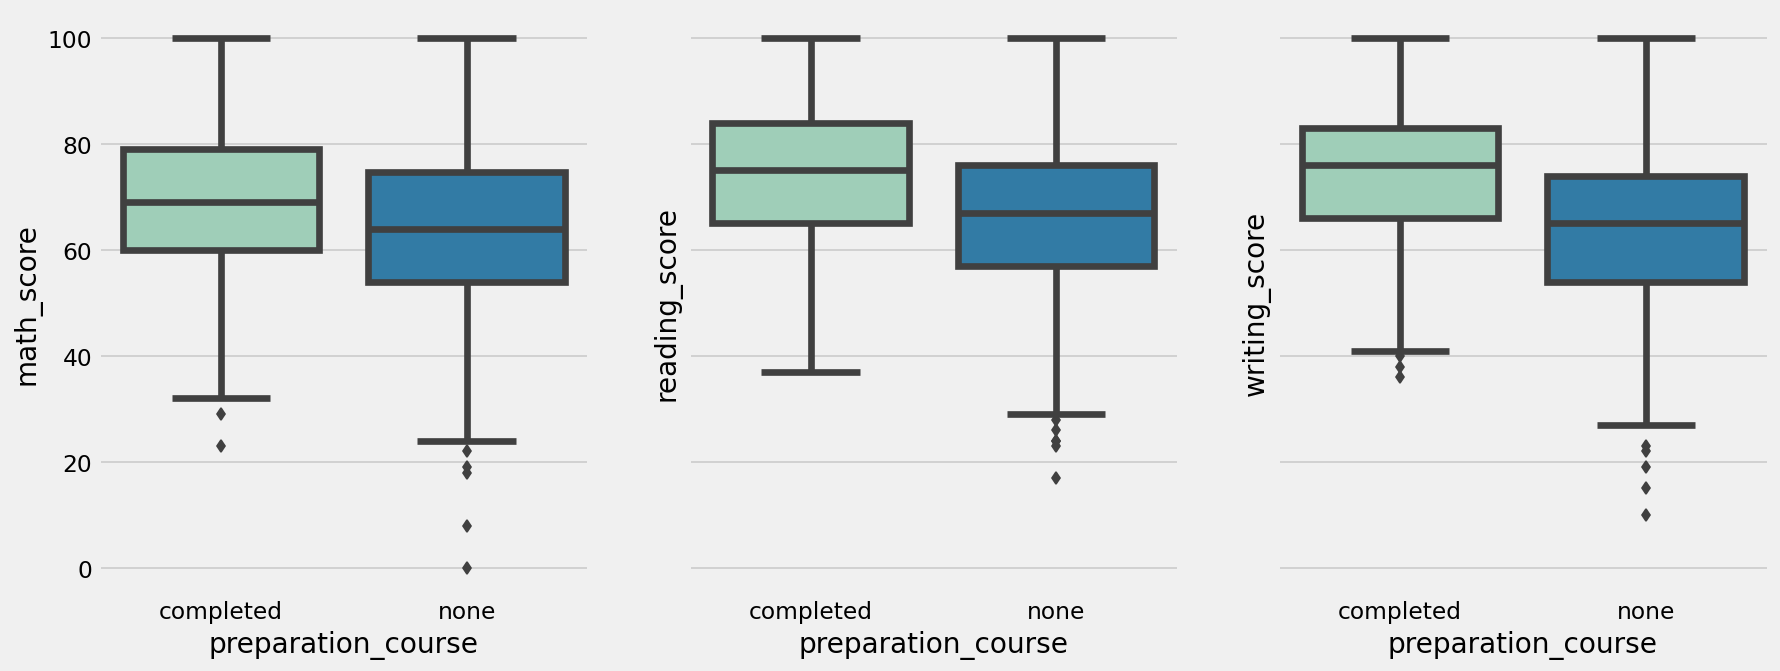

In [25]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6), sharey = True, dpi = 120)

sns.boxplot(y = 'math_score', data = df, ax = ax[0], x = 'preparation_course', palette = 'YlGnBu')
sns.boxplot(y = 'reading_score', data = df, ax = ax[1], x = 'preparation_course', palette = 'YlGnBu')
sns.boxplot(y = 'writing_score', data = df, ax = ax[2], x = 'preparation_course', palette = 'YlGnBu')

plt.show()

<div align = 'center' ><b> We can see here that most students who scored below 40 didn't take the preparation course.</b> </div>

_________________________

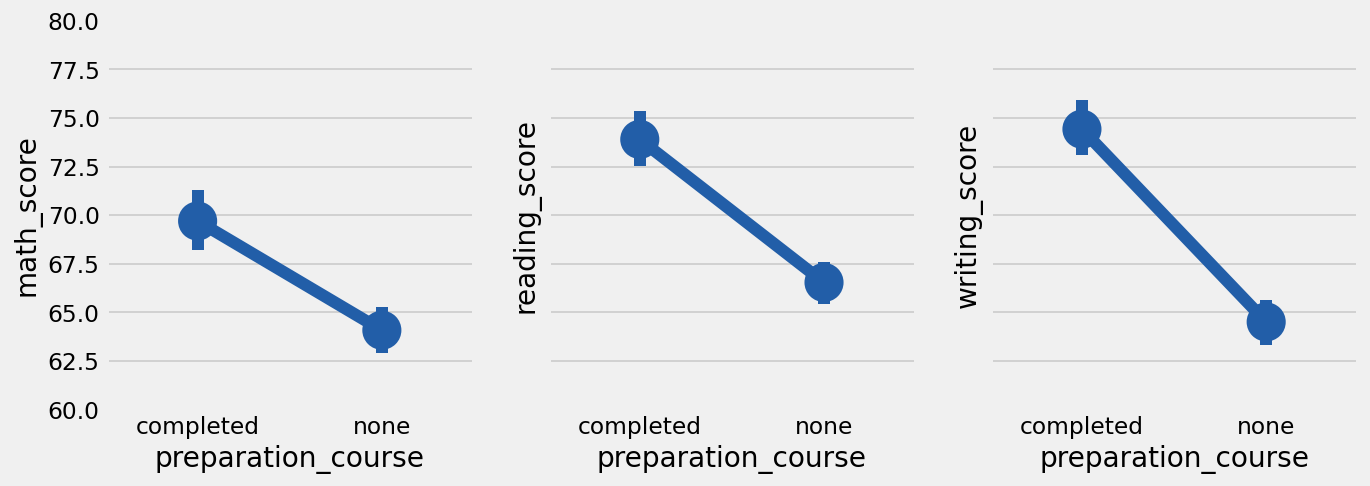

In [26]:
fig, ax = plt.subplots(1, 3, figsize= (12, 4), sharey = True, dpi = 120)

ax[0].set(ylim = (60, 80))

sns.pointplot(y = 'math_score', data = df, ax = ax[0], x = 'preparation_course', color = '#225ea8')
sns.pointplot(y = 'reading_score', data = df, ax = ax[1], x = 'preparation_course', color = '#225ea8')
sns.pointplot(y = 'writing_score', data = df, ax = ax[2], x = 'preparation_course', color = '#225ea8')

plt.show()

<div align = 'center' ><b> On Average, Students who took the preparation course scored higher than these who didn't.</b> </div>

_________________________

- ## Did different races score different in exams?

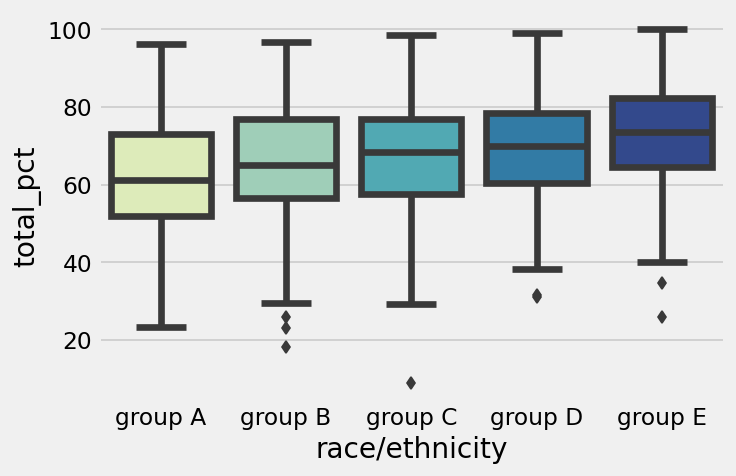

In [27]:
fig, ax = plt.subplots(figsize = (6, 4), dpi = 120)

sns.boxplot(x = 'race/ethnicity', data = df, y = 'total_pct', ax = ax, palette = 'YlGnBu')

plt.show()

- ## Do different genders score diffrent in exams ?

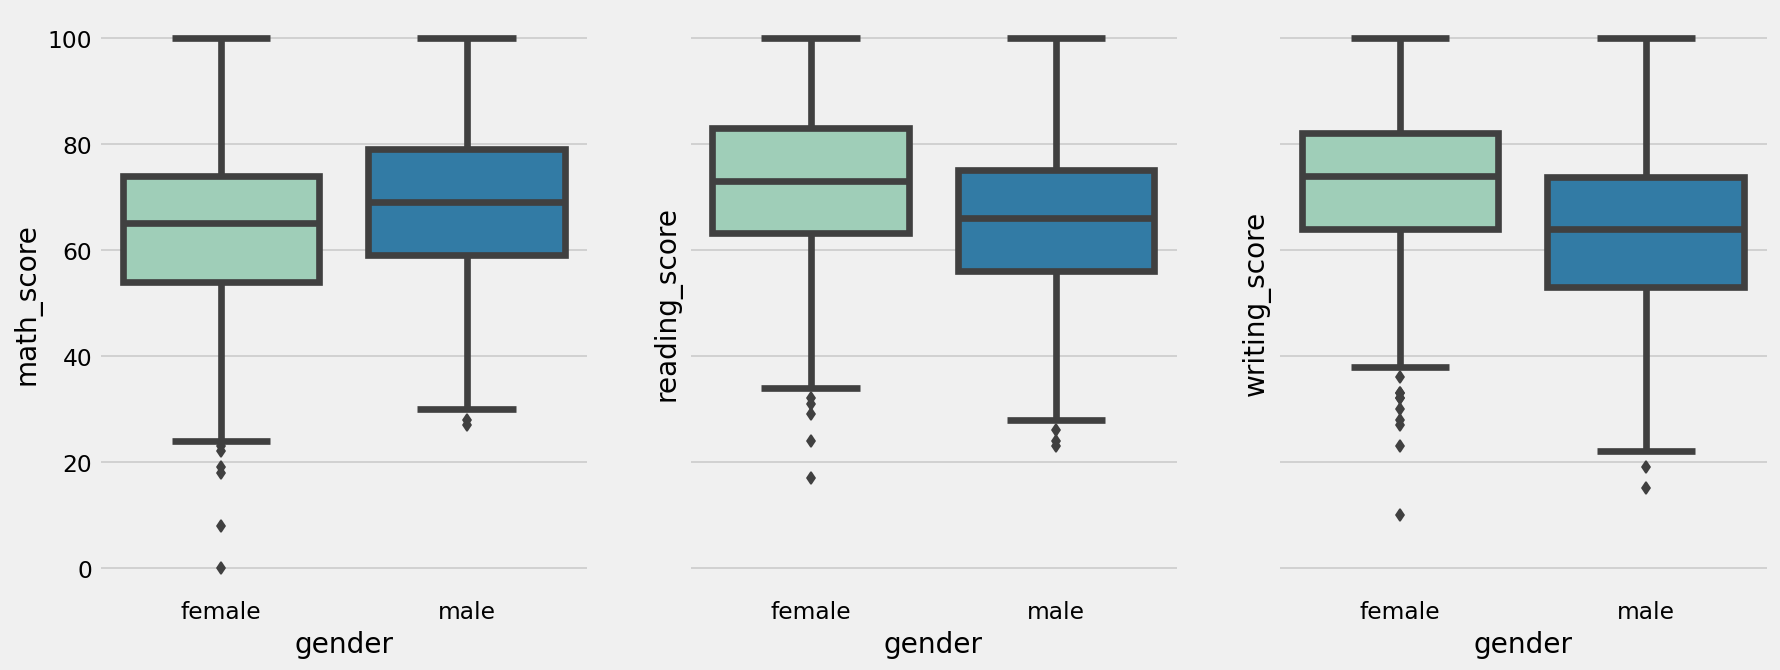

In [28]:
fig, ax = plt.subplots(1, 3, figsize = (16, 6), sharey = True, dpi = 120)

sns.boxplot(y = 'math_score', data = df, ax = ax[0], x = 'gender', palette = 'YlGnBu')
sns.boxplot(y = 'reading_score', data = df, ax = ax[1], x = 'gender', palette = 'YlGnBu')
sns.boxplot(y = 'writing_score', data = df, ax = ax[2], x = 'gender', palette = 'YlGnBu')

plt.show()

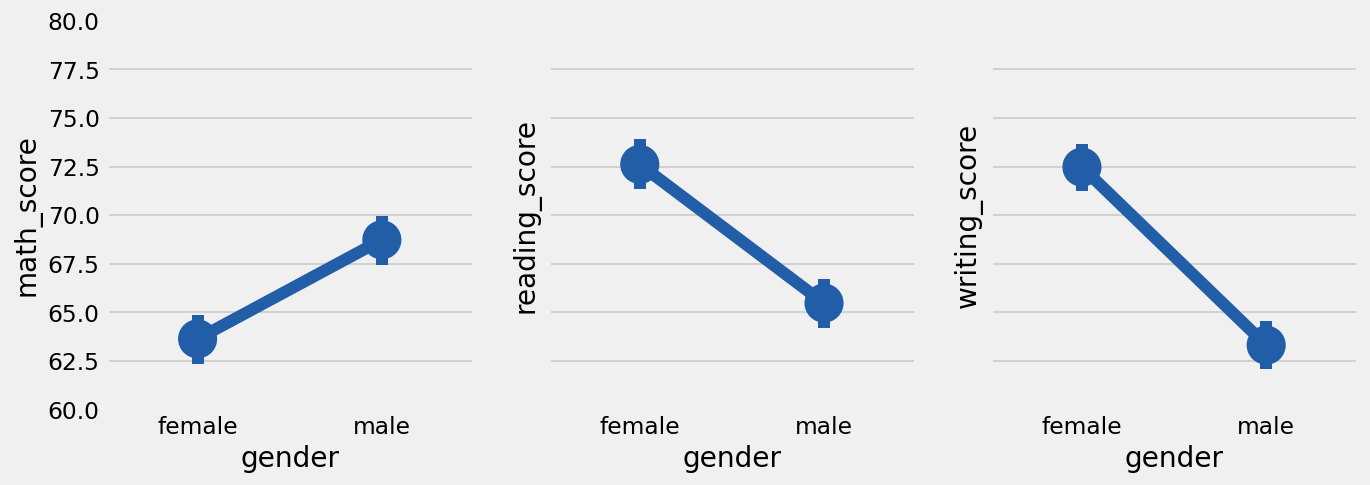

In [29]:
fig, ax = plt.subplots(1, 3, figsize = (12, 4), sharey = True, dpi = 120)

ax[0].set(ylim = (60, 80))
sns.pointplot(y = 'math_score', data = df, ax = ax[0], x = 'gender', color = '#225ea8')
sns.pointplot(y = 'reading_score', data = df, ax = ax[1], x = 'gender', color = '#225ea8')
sns.pointplot(y = 'writing_score', data = df, ax = ax[2], x = 'gender', color = '#225ea8')

plt.show()

<div align = 'center' ><b> We see that in average, males scored higher in the math exam, however females scored higher in both reading and writing exams .</b> </div>

_________________________

- ## Do parental level of education acffect the students' score ?

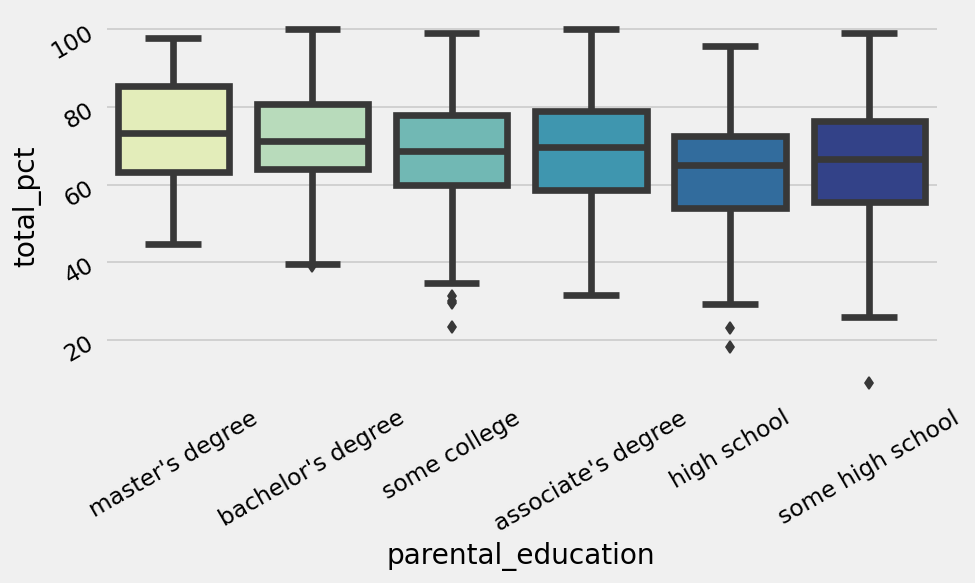

In [30]:
fig, ax = plt.subplots(figsize = (8, 4), dpi = 120)

sns.boxplot(x = 'parental_education', data = df, y = 'total_pct', ax = ax, palette = 'YlGnBu',
            order = ['master\'s degree','bachelor\'s degree','some college','associate\'s degree',
                     'high school','some high school'])
ax.tick_params(labelrotation = 30)
plt.show()

<div align = 'center' ><b> We can see that students whose partents have a higher level of education scored higher.</b> </div>

_________________________

- ## Do students who score better in math score good in the rest of subjects ?

In [31]:
corr_matrix = df[['math_score','reading_score','writing_score']].corr()
corr_matrix

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


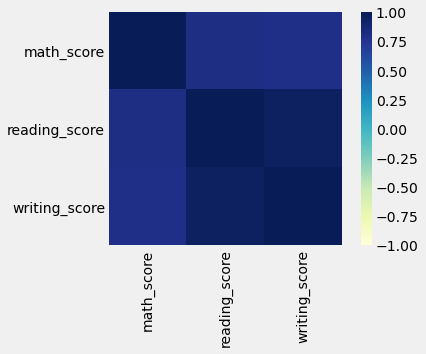

In [32]:
sns.heatmap(corr_matrix, square = True, cmap = 'YlGnBu', vmin = -1, vmax = 1)

plt.show()

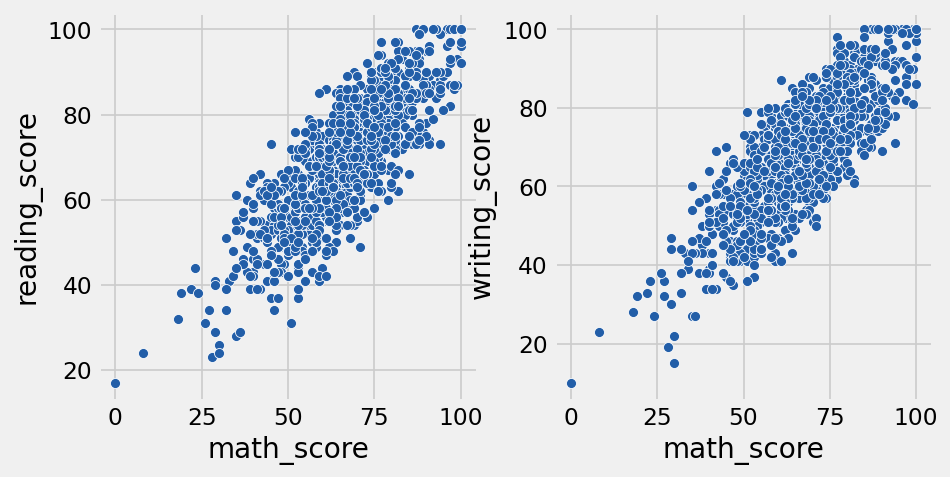

In [33]:
fig, ax = plt.subplots(1, 2, figsize = (8, 4), dpi = 120)

sns.scatterplot(x = 'math_score', y = 'reading_score', data = df, ax = ax[0], color = '#225ea8')
sns.scatterplot(x = 'math_score', y = 'writing_score', data = df, ax = ax[1], color = '#225ea8')

plt.show()

<div align = 'center' ><b> There's strong correlation between  scoring good in one exam and scoring good in the rest
    <br>Students who scored high in math are $0.8$ more likely to score high in reading and writing.</b> </div>

_________________________